In [101]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [102]:
df = pd.read_csv("./datasets/combined_df_wo_infra.csv")
df.head()

,Country,Gini coefficient 1990,Gini coefficient 1991,Gini coefficient 1992,Gini coefficient 1993,Gini coefficient 1994,Gini coefficient 1995,Gini coefficient 1996,Gini coefficient 1997,Gini coefficient 1998,...,2013 Mortality,2014 Mortality,2015 Mortality,2016 Mortality,2017 Mortality,2018 Mortality,2019 Mortality,2020 Mortality,2021 Mortality,2022 Mortality
0,Albania,0.270103,0.270103,0.270103,0.270103,0.270103,0.270103,0.270103,0.270103,0.270103,...,7.746357,7.329462,6.910799,6.520890,6.182847,5.907073,5.690909,5.515814,5.376167,5.252144
1,Algeria,0.353301,0.353301,0.353301,0.353301,0.353301,0.353301,0.353301,0.353301,0.353301,...,10.237530,10.161968,10.027424,9.839101,9.604716,9.322065,8.982225,8.604674,8.241613,7.953160
2,Angola,0.519447,0.519447,0.519447,0.519447,0.519447,0.519447,0.519447,0.519447,0.519447,...,58.998576,56.554353,54.426747,52.619912,50.929586,49.409288,47.997828,46.713510,45.551972,44.449184
3,Armenia,0.362197,0.362197,0.362197,0.362197,0.362197,0.362197,0.362197,0.362197,0.362197,...,6.606133,7.062106,7.966167,8.507257,8.112138,7.307098,6.660999,6.572645,7.533118,11.212091
4,Australia,0.325786,0.325786,0.325786,0.325786,0.325786,0.325786,0.325786,0.325786,0.325786,...,4.572380,4.477610,4.424821,4.416563,4.448280,4.496637,4.534294,4.541600,4.505020,4.419226


In [103]:
recent_data = pd.DataFrame()
recent_data['Country'] = df['Country']

# Select the most recent non-null value for each feature
recent_data['Gini'] = df['Gini coefficient 2022']
recent_data['GDP_per_capita'] = df['GDP per Capita 2022']
recent_data['Expected_School_Years'] = df['Expected Years of Schooling (2021)']
recent_data['Mean_School_Years'] = df['Mean Years of Schooling (2021)']
recent_data['Literacy_Rate'] = df['Literacy rate 2022']
recent_data['Internet_Usage'] = df['Internet Usage (% of Population) 2022']
recent_data['CO2_per_capita'] = df['2023 CO2 per capita']  # Using the first CO2 column
recent_data['CO2_per_capita_2'] = df['2023 CO2 per capita #2']  # Using the second CO2 column
recent_data['Energy'] = df['2021 Energy']
recent_data['Mortality_2022'] = df['2022 Mortality']

In [104]:
recent_data = recent_data.dropna()
recent_data


,Country,Gini,GDP_per_capita,Expected_School_Years,Mean_School_Years,Literacy_Rate,Internet_Usage,CO2_per_capita,CO2_per_capita_2,Energy,Mortality_2022
0,Albania,0.294196,5154.827498,14.448000,11.286455,98.50000,82.6137,1.830,0.0,5.973814e-01,5.252144
1,Algeria,0.276157,4544.466881,14.626896,8.069284,81.40784,71.2432,3.859,0.0,1.278755e+01,7.953160
2,Angola,0.512640,2382.022640,12.172100,5.417391,72.40000,39.2935,0.565,0.0,2.253067e+01,44.449184
3,Armenia,0.279453,4791.004817,13.116760,11.330300,100.00000,77.0277,2.585,0.0,8.214619e-09,11.212091
4,Australia,0.343326,61009.807715,21.054590,12.726820,99.00000,94.8762,14.478,0.0,1.631391e+00,4.419226
...,...,...,...,...,...,...,...,...,...,...,...
135,Uruguay,0.405517,18213.695614,16.832600,8.982550,99.00000,89.8730,2.322,0.0,8.932978e-03,11.056742
136,Uzbekistan,0.311848,3576.715527,12.477140,11.895590,100.00000,83.9000,3.500,0.0,8.438090e+00,10.435145
137,Vanuatu,0.323176,2631.551863,11.535315,7.064846,89.10000,69.8888,0.706,0.0,0.000000e+00,13.557602
138,Zambia,0.514831,1298.848050,10.928760,7.187091,87.50000,31.2342,0.374,0.0,2.307122e-02,30.978062


In [105]:
X = recent_data.drop(columns=['Country', 'Mortality_2022'])
y = recent_data['Mortality_2022']

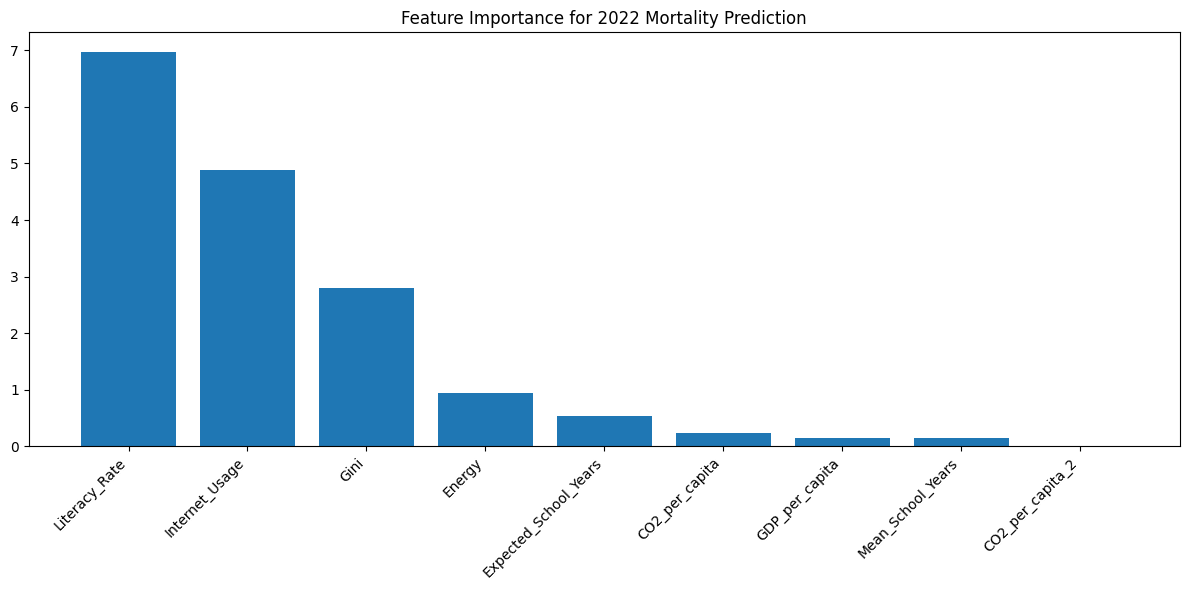


Feature Importance Rankings:
Literacy_Rate: 6.9711
Internet_Usage: 4.8904
Gini: 2.8063
Energy: 0.9326
Expected_School_Years: 0.5371
CO2_per_capita: 0.2402
GDP_per_capita: 0.1438
Mean_School_Years: 0.1428
CO2_per_capita_2: 0.0000

Model R² Score: 0.7983


In [106]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Fit linear regression model
model = LinearRegression()
model.fit(X_scaled, y)

# Get feature importance based on absolute coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(model.coef_)
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance for 2022 Mortality Prediction')
plt.tight_layout()
plt.show()

# Print feature importance with their coefficients
print("\nFeature Importance Rankings:")
for idx, row in feature_importance.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

# Print model performance
print(f"\nModel R² Score: {model.score(X_scaled, y):.4f}")

In [107]:
def objective(weights):
    cdi = np.dot(X_scaled, weights)
    correlation = np.corrcoef(cdi, y)[0, 1]
    return -abs(correlation)  # Negative because we want to maximize correlation

# Function to ensure weights sum to 1
def constraint(weights):
    return np.sum(weights) - 1

# Initial weights (equal weighting)
initial_weights = np.ones(len(X.columns)) / len(X.columns)

In [95]:
X_scaled_np = X_scaled.values
y_np = y.values
initial_weights = np.ones(X_scaled_np.shape[1]) / X_scaled_np.shape[1]
def jacobian(weights):
    cdi = np.dot(X_scaled_np, weights)
    
    # Calculate the gradient of correlation coefficient
    n = len(y_np)
    mean_cdi = np.mean(cdi)
    mean_y = np.mean(y_np)
    
    # Compute standard deviations
    std_cdi = np.std(cdi)
    std_y = np.std(y_np)
    
    # Gradient of correlation coefficient
    grad = np.zeros(len(weights))
    for i in range(len(weights)):
        # Derivative of correlation coefficient with respect to weight i
        dcdi_dwi = X_scaled_np[:, i]
        
        # Chain rule for correlation coefficient
        grad[i] = np.sum((y_np - mean_y) * dcdi_dwi) / (n * std_cdi * std_y) - \
                 np.sum((cdi - mean_cdi) * (y_np - mean_y)) * np.sum(dcdi_dwi * (cdi - mean_cdi)) / \
                 (n * n * std_cdi**3 * std_y)
    
    # Negative because we're minimizing
    return -grad

In [111]:
constraints = ({'type': 'eq', 'fun': constraint})
bounds = [(0, 1) for _ in range(len(X.columns))]

# Perform optimization
# Nelder-Mead = -0.8723
# Powell = -0.8724
# SLSQP = -0.8724
# CG = -0.8935
# BFGS = -0.8935
# L-BFGS-B = -0.8724
# TNC = -0.8724
# trust-constr = -0.8724
# Newton-cg = -0.7447
# TNC = -0.7447

# Perform optimization using Newton-CG with explicit Jacobian
result = minimize(objective, initial_weights, bounds=bounds, constraints=constraints, method='CG')

# Get optimal weights
optimal_weights = result.x

# Calculate final CDI
cdi = np.dot(X_scaled, optimal_weights)

# Print the optimal weights
print("Optimal Weights:")
for feature, weight in zip(X.columns, optimal_weights):
    print(f"{feature}: {weight:.4f}")

# Print the final CDI
print(f"\nFinal CDI: {cdi[0]:.4f}")
cdi 
# Average correlation between cdi and mortality
correlation = np.corrcoef(cdi, y)[0, 1]
print(f"Average Correlation between CDI and Mortality: {correlation:.4f}")


Optimal Weights:
Gini: -0.5041
GDP_per_capita: 0.0259
Expected_School_Years: 0.0964
Mean_School_Years: 0.0257
Literacy_Rate: 1.2521
Internet_Usage: 0.8784
CO2_per_capita: -0.0432
CO2_per_capita_2: 0.1111
Energy: -0.1675

Final CDI: 1.8726
Average Correlation between CDI and Mortality: -0.8935


/var/folders/31/w2zt100d46vbd05gsww_hqj00000gn/T/ipykernel_67834/165252814.py:17: RuntimeWarning: Method CG cannot handle constraints.
  result = minimize(objective, initial_weights, bounds=bounds, constraints=constraints, method='CG')
/var/folders/31/w2zt100d46vbd05gsww_hqj00000gn/T/ipykernel_67834/165252814.py:17: RuntimeWarning: Method CG cannot handle bounds.
  result = minimize(objective, initial_weights, bounds=bounds, constraints=constraints, method='CG')


In [44]:
# get correlation between cdi and mortality
correlation = np.corrcoef(cdi, y)[0, 1]
print(f"Correlation between CDI and Mortality: {correlation:.4f}")

Correlation between CDI and Mortality: -0.8724


In [47]:
# get correlation between hdi and mortality
correlation = np.corrcoef(df['Human Development Index (2021)'], df['2022 Mortality'])[0, 1]
print(f"Correlation between HDI and Mortality: {correlation:.4f}")

Correlation between HDI and Mortality: -0.8604
